# LoRaWAN Session Data Analyzer

Dieses Notebook analysiert LoRaWAN-Sitzungsdaten und erstellt detaillierte Statistiken über:
- RSSI (Received Signal Strength Indicator)
- SNR (Signal-to-Noise Ratio)
- Spreading Factor Verteilung
- Frequenz Verteilung
- Frame Counter Analyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import warnings
warnings.filterwarnings('ignore')

# Deutsche Lokalisierung für Matplotlib
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

## 1. Datenladen und Vorbereitung

In [2]:
def load_lorawan_data(file_path):
    """
    Lädt LoRaWAN-Daten aus einer CSV-Datei
    """
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Datei geladen: {file_path}")
        print(f"📊 Anzahl Datenpunkte: {len(df)}")
        
        # Zeige verfügbare Spalten
        print(f"📋 Verfügbare Spalten: {list(df.columns)}")
        return df
    except Exception as e:
        print(f"❌ Fehler beim Laden der Datei {file_path}: {e}")
        return None

# Datei auswählen - passe den Pfad entsprechend an
data_path = r"C:\Users\Admin01\Documents\Bachlore\gatewaylistener\Lora_Sesion_Data\zusammengefuegt.csv"

# Alternative: Alle CSV-Dateien im Verzeichnis anzeigen
csv_files = glob.glob(r"C:\Users\Admin01\Documents\Bachlore\gatewaylistener\Lora_Sesion_Data\*.csv")
print("📁 Verfügbare CSV-Dateien:")
for i, file in enumerate(csv_files[:10]):  # Zeige nur die ersten 10
    print(f"  {i+1}. {Path(file).name}")

# Lade die Daten
df = load_lorawan_data(data_path)

if df is not None:
    # Erste 5 Zeilen anzeigen
    print("\n📈 Erste 5 Datenpunkte:")
    display(df.head())

📁 Verfügbare CSV-Dateien:
  1. lorawan_session_20250707_221949_TL2_Lang.csv
  2. lorawan_session_20250707_235158_TL2_Schacht_zu.csv
  3. lorawan_session_20250708_001649_leitung nord offen auf auto.csv
  4. lorawan_session_20250708_004441_LeitungNordzu.csv
  5. zusammengefuegt.csv
✅ Datei geladen: C:\Users\Admin01\Documents\Bachlore\gatewaylistener\Lora_Sesion_Data\zusammengefuegt.csv
📊 Anzahl Datenpunkte: 772
📋 Verfügbare Spalten: ['timestamp', 'session_id', 'application_id', 'device_eui', 'event_type', 'fcnt', 'fport', 'raw_data_hex', 'raw_data_ascii', 'decoded_payload', 'gateway_id', 'rssi_dbm', 'snr_db', 'spreading_factor', 'bandwidth', 'frequency', 'gateway_lat', 'gateway_lon', 'gateway_alt', 'device_lat', 'device_lon', 'device_alt', 'battery_level', 'margin_db', 'acknowledged', 'gps_source', 'gps_format']

📈 Erste 5 Datenpunkte:


,timestamp,session_id,application_id,device_eui,event_type,fcnt,fport,raw_data_hex,raw_data_ascii,decoded_payload,...,gateway_lon,gateway_alt,device_lat,device_lon,device_alt,battery_level,margin_db,acknowledged,gps_source,gps_format
0,2025-07-07 22:20:40,ca42b3c2,25fd7890-9fa0-4b65-91c8-2d4159673db0,78563412efbeadde,up,17,8,7b2264223a5b32312e382c32342e355d2c227366223a31...,"{""d"":[21.8,24.5],""sf"":12,""t"":16}","{""d"": [21.8, 24.5], ""sf"": 12, ""t"": 16}",...,NaN,NaN,21.8,24.5,NaN,NaN,NaN,NaN,payload_json,array_d
1,2025-07-07 22:20:48,ca42b3c2,25fd7890-9fa0-4b65-91c8-2d4159673db0,78563412efbeadde,up,18,8,7b2264223a5b32322e362c32342e335d2c227366223a37...,"{""d"":[22.6,24.3],""sf"":7,""t"":17}","{""d"": [22.6, 24.3], ""sf"": 7, ""t"": 17}",...,NaN,NaN,22.6,24.3,NaN,NaN,NaN,NaN,payload_json,array_d
2,2025-07-07 22:20:57,ca42b3c2,25fd7890-9fa0-4b65-91c8-2d4159673db0,78563412efbeadde,up,19,8,7b2264223a5b32332e362c32342e365d2c227366223a38...,"{""d"":[23.6,24.6],""sf"":8,""t"":18}","{""d"": [23.6, 24.6], ""sf"": 8, ""t"": 18}",...,NaN,NaN,23.6,24.6,NaN,NaN,NaN,NaN,payload_json,array_d
3,2025-07-07 22:21:05,ca42b3c2,25fd7890-9fa0-4b65-91c8-2d4159673db0,78563412efbeadde,up,20,8,7b2264223a5b32332e382c32332e365d2c227366223a39...,"{""d"":[23.8,23.6],""sf"":9,""t"":19}","{""d"": [23.8, 23.6], ""sf"": 9, ""t"": 19}",...,NaN,NaN,23.8,23.6,NaN,NaN,NaN,NaN,payload_json,array_d
4,2025-07-07 22:21:13,ca42b3c2,25fd7890-9fa0-4b65-91c8-2d4159673db0,78563412efbeadde,up,21,8,7b2264223a5b32342e322c32332e305d2c227366223a31...,"{""d"":[24.2,23.0],""sf"":10,""t"":19}","{""d"": [24.2, 23.0], ""sf"": 10, ""t"": 19}",...,NaN,NaN,24.2,23.0,NaN,NaN,NaN,NaN,payload_json,array_d


## 2. Datenvalidierung und -bereinigung

In [3]:
def validate_and_clean_data(df):
    """
    Validiert und bereinigt die LoRaWAN-Daten
    """
    if df is None:
        return None
        
    print("🔍 Datenvalidierung:")
    
    # Prüfe auf erforderliche Spalten
    required_columns = ['rssi_dbm', 'snr_db', 'spreading_factor', 'frequency']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"⚠️  Fehlende Spalten: {missing_columns}")
        # Versuche alternative Spaltennamen
        column_mapping = {
            'rssi': 'rssi_dbm',
            'snr': 'snr_db',
            'sf': 'spreading_factor',
            'freq': 'frequency'
        }
        
        for alt_name, standard_name in column_mapping.items():
            if alt_name in df.columns and standard_name not in df.columns:
                df[standard_name] = df[alt_name]
                print(f"✅ Spalte '{alt_name}' umbenannt zu '{standard_name}'")
    
    # Entferne Zeilen mit fehlenden Werten in kritischen Spalten
    initial_count = len(df)
    df_clean = df.dropna(subset=['rssi_dbm', 'snr_db', 'spreading_factor', 'frequency'])
    dropped_count = initial_count - len(df_clean)
    
    if dropped_count > 0:
        print(f"🧹 {dropped_count} Zeilen mit fehlenden Werten entfernt")
    
    # Datentypen konvertieren
    numeric_columns = ['rssi_dbm', 'snr_db', 'spreading_factor', 'frequency']
    for col in numeric_columns:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Zeitstempel konvertieren falls vorhanden
    time_columns = ['timestamp', 'time', 'datetime']
    for col in time_columns:
        if col in df_clean.columns:
            try:
                df_clean[col] = pd.to_datetime(df_clean[col])
                print(f"⏰ Zeitstempel-Spalte '{col}' konvertiert")
                break
            except:
                continue
    
    print(f"✅ Bereinigte Daten: {len(df_clean)} Datenpunkte")
    return df_clean

# Daten validieren und bereinigen
df_clean = validate_and_clean_data(df)

if df_clean is not None and len(df_clean) > 0:
    print("\n📊 Datenübersicht nach Bereinigung:")
    display(df_clean.describe())

🔍 Datenvalidierung:
🧹 29 Zeilen mit fehlenden Werten entfernt
⏰ Zeitstempel-Spalte 'timestamp' konvertiert
✅ Bereinigte Daten: 743 Datenpunkte

📊 Datenübersicht nach Bereinigung:


,timestamp,fcnt,fport,rssi_dbm,snr_db,spreading_factor,bandwidth,frequency,gateway_lat,gateway_lon,gateway_alt,device_lat,device_lon,device_alt,battery_level,margin_db,acknowledged
count,743,743.000000,743.0,743.000000,743.000000,0.0,743.0,7.430000e+02,0.0,0.0,0.0,743.000000,743.000000,0.0,0.0,0.0,0.0
mean,2025-07-07 23:20:59.488559872,309.562584,8.0,-83.648721,0.563930,NaN,125000.0,8.683051e+08,NaN,NaN,NaN,28.434993,15.785061,NaN,NaN,NaN,NaN
min,2025-07-07 22:20:40,0.000000,8.0,-98.000000,-16.500000,NaN,125000.0,8.671000e+08,NaN,NaN,NaN,21.100000,6.700000,NaN,NaN,NaN,NaN
25%,2025-07-07 22:49:01,100.000000,8.0,-89.000000,-2.200000,NaN,125000.0,8.681000e+08,NaN,NaN,NaN,26.200000,12.500000,NaN,NaN,NaN,NaN
50%,2025-07-07 23:17:42,297.000000,8.0,-88.000000,-0.500000,NaN,125000.0,8.683000e+08,NaN,NaN,NaN,28.500000,14.500000,NaN,NaN,NaN,NaN
75%,2025-07-07 23:46:14,495.500000,8.0,-86.500000,2.500000,NaN,125000.0,8.685000e+08,NaN,NaN,NaN,30.700000,19.300000,NaN,NaN,NaN,NaN
max,2025-07-08 00:50:37,692.000000,8.0,-9.000000,16.200000,NaN,125000.0,8.685000e+08,NaN,NaN,NaN,35.400000,26.800000,NaN,NaN,NaN,NaN
std,NaN,210.180460,0.0,13.063050,5.210664,NaN,0.0,1.710148e+05,NaN,NaN,NaN,2.977497,4.675987,NaN,NaN,NaN,NaN


## 3. Hauptanalyse-Funktion

In [4]:
def analyze_lorawan_session(df):
    """
    Hauptfunktion zur Analyse der LoRaWAN-Sitzungsdaten
    """
    if df is None or len(df) == 0:
        print("❌ Keine Daten zur Analyse verfügbar")
        return
    
    print("\n" + "="*60)
    print("📡 LORAWAN SESSION ANALYSE")
    print("="*60)
    
    print(f"\n📊 Gesamtanzahl Nachrichten: {len(df)}")
    
    # RSSI Statistiken
    print("\n📶 RSSI (Received Signal Strength Indicator):")
    rssi_stats = df['rssi_dbm'].describe()
    print(f"   Durchschnitt: {rssi_stats['mean']:.2f} dBm")
    print(f"   Bereich: {rssi_stats['min']:.1f} bis {rssi_stats['max']:.1f} dBm")
    print(f"   Standardabweichung: {rssi_stats['std']:.2f} dBm")
    
    # RSSI Qualitätsbewertung
    excellent_rssi = (df['rssi_dbm'] >= -80).sum()
    good_rssi = ((df['rssi_dbm'] >= -90) & (df['rssi_dbm'] < -80)).sum()
    fair_rssi = ((df['rssi_dbm'] >= -100) & (df['rssi_dbm'] < -90)).sum()
    poor_rssi = (df['rssi_dbm'] < -100).sum()
    
    print(f"   🟢 Exzellent (≥ -80 dBm): {excellent_rssi} ({(excellent_rssi/len(df)*100):.1f}%)")
    print(f"   🟡 Gut (-90 bis -80 dBm): {good_rssi} ({(good_rssi/len(df)*100):.1f}%)")
    print(f"   🟠 Akzeptabel (-100 bis -90 dBm): {fair_rssi} ({(fair_rssi/len(df)*100):.1f}%)")
    print(f"   🔴 Schwach (< -100 dBm): {poor_rssi} ({(poor_rssi/len(df)*100):.1f}%)")
    
    # SNR Statistiken
    print("\n📡 SNR (Signal-to-Noise Ratio):")
    snr_stats = df['snr_db'].describe()
    print(f"   Durchschnitt: {snr_stats['mean']:.2f} dB")
    print(f"   Bereich: {snr_stats['min']:.1f} bis {snr_stats['max']:.1f} dB")
    print(f"   Standardabweichung: {snr_stats['std']:.2f} dB")
    
    # Analyse der SNR-Robustheit
    low_snr_count = (df['snr_db'] < 0).sum()
    if low_snr_count > 0:
        print(f"   ✅ Robuste Verbindungen: {low_snr_count} Nachrichten mit SNR < 0 dB erfolgreich empfangen")
        print(f"   💪 Systemrobustheit: {(low_snr_count / len(df)) * 100:.1f}% funktionieren auch bei niedrigem SNR")
    
    # SNR Qualitätsbewertung
    excellent_snr = (df['snr_db'] >= 10).sum()
    good_snr = ((df['snr_db'] >= 5) & (df['snr_db'] < 10)).sum()
    fair_snr = ((df['snr_db'] >= 0) & (df['snr_db'] < 5)).sum()
    poor_snr = (df['snr_db'] < 0).sum()
    
    print(f"   🟢 Exzellent (≥ 10 dB): {excellent_snr} ({(excellent_snr/len(df)*100):.1f}%)")
    print(f"   🟡 Gut (5-10 dB): {good_snr} ({(good_snr/len(df)*100):.1f}%)")
    print(f"   🟠 Akzeptabel (0-5 dB): {fair_snr} ({(fair_snr/len(df)*100):.1f}%)")
    print(f"   🔴 Kritisch (< 0 dB): {poor_snr} ({(poor_snr/len(df)*100):.1f}%)")
    
    # Spreading Factor Verteilung
    print("\n🔄 Spreading Factor Verteilung:")
    sf_counts = df['spreading_factor'].value_counts().sort_index()
    for sf, count in sf_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   SF{int(sf)}: {count} Nachrichten ({percentage:.1f}%)")
    
    # Frequenz Verteilung
    print("\n📻 Frequenz Verteilung:")
    freq_counts = df['frequency'].value_counts().sort_index()
    for freq, count in freq_counts.items():
        percentage = (count / len(df)) * 100
        freq_mhz = freq / 1_000_000  # Hz zu MHz
        print(f"   {freq_mhz:.1f} MHz: {count} Nachrichten ({percentage:.1f}%)")
    
    # Frame Counter Analyse
    if 'fcnt' in df.columns:
        print("\n🔢 Frame Counter:")
        fcnt_stats = df['fcnt'].describe()
        print(f"   Bereich: {fcnt_stats['min']:.0f} bis {fcnt_stats['max']:.0f}")
        if len(df) > 1:
            expected_packets = int(fcnt_stats['max'] - fcnt_stats['min'] + 1)
            received_packets = len(df)
            packet_loss = expected_packets - received_packets
            if packet_loss > 0:
                loss_rate = (packet_loss / expected_packets) * 100
                print(f"   ❌ Möglicher Paketverlust: {packet_loss} Pakete ({loss_rate:.1f}%)")
                print(f"   📦 Empfangen: {received_packets}/{expected_packets} Pakete")
            else:
                print(f"   ✅ Kein Paketverlust erkannt")
    
    # Zeitanalyse falls Zeitstempel verfügbar
    time_columns = ['timestamp', 'time', 'datetime']
    time_col = None
    for col in time_columns:
        if col in df.columns:
            time_col = col
            break
    
    if time_col is not None:
        print(f"\n⏰ Zeitanalyse:")
        try:
            time_range = df[time_col].max() - df[time_col].min()
            print(f"   Sitzungsdauer: {time_range}")
            
            # Nachrichten pro Stunde
            if time_range.total_seconds() > 0:
                messages_per_hour = len(df) / (time_range.total_seconds() / 3600)
                print(f"   Nachrichten pro Stunde: {messages_per_hour:.1f}")
        except:
            print("   ⚠️  Zeitanalyse nicht möglich")
    
    return df

# Führe die Analyse durch
if df_clean is not None:
    analyzed_df = analyze_lorawan_session(df_clean)


📡 LORAWAN SESSION ANALYSE

📊 Gesamtanzahl Nachrichten: 743

📶 RSSI (Received Signal Strength Indicator):
   Durchschnitt: -83.65 dBm
   Bereich: -98.0 bis -9.0 dBm
   Standardabweichung: 13.06 dBm
   🟢 Exzellent (≥ -80 dBm): 123 (16.6%)
   🟡 Gut (-90 bis -80 dBm): 573 (77.1%)
   🟠 Akzeptabel (-100 bis -90 dBm): 47 (6.3%)
   🔴 Schwach (< -100 dBm): 0 (0.0%)

📡 SNR (Signal-to-Noise Ratio):
   Durchschnitt: 0.56 dB
   Bereich: -16.5 bis 16.2 dB
   Standardabweichung: 5.21 dB
   ✅ Robuste Verbindungen: 432 Nachrichten mit SNR < 0 dB erfolgreich empfangen
   💪 Systemrobustheit: 58.1% funktionieren auch bei niedrigem SNR
   🟢 Exzellent (≥ 10 dB): 58 (7.8%)
   🟡 Gut (5-10 dB): 76 (10.2%)
   🟠 Akzeptabel (0-5 dB): 177 (23.8%)
   🔴 Kritisch (< 0 dB): 432 (58.1%)

🔄 Spreading Factor Verteilung:

📻 Frequenz Verteilung:
   867.1 MHz: 1 Nachrichten (0.1%)
   867.5 MHz: 1 Nachrichten (0.1%)
   868.1 MHz: 231 Nachrichten (31.1%)
   868.3 MHz: 250 Nachrichten (33.6%)
   868.5 MHz: 260 Nachrichten (35

## 4. Visualisierungen

ValueError: cannot convert float NaN to integer

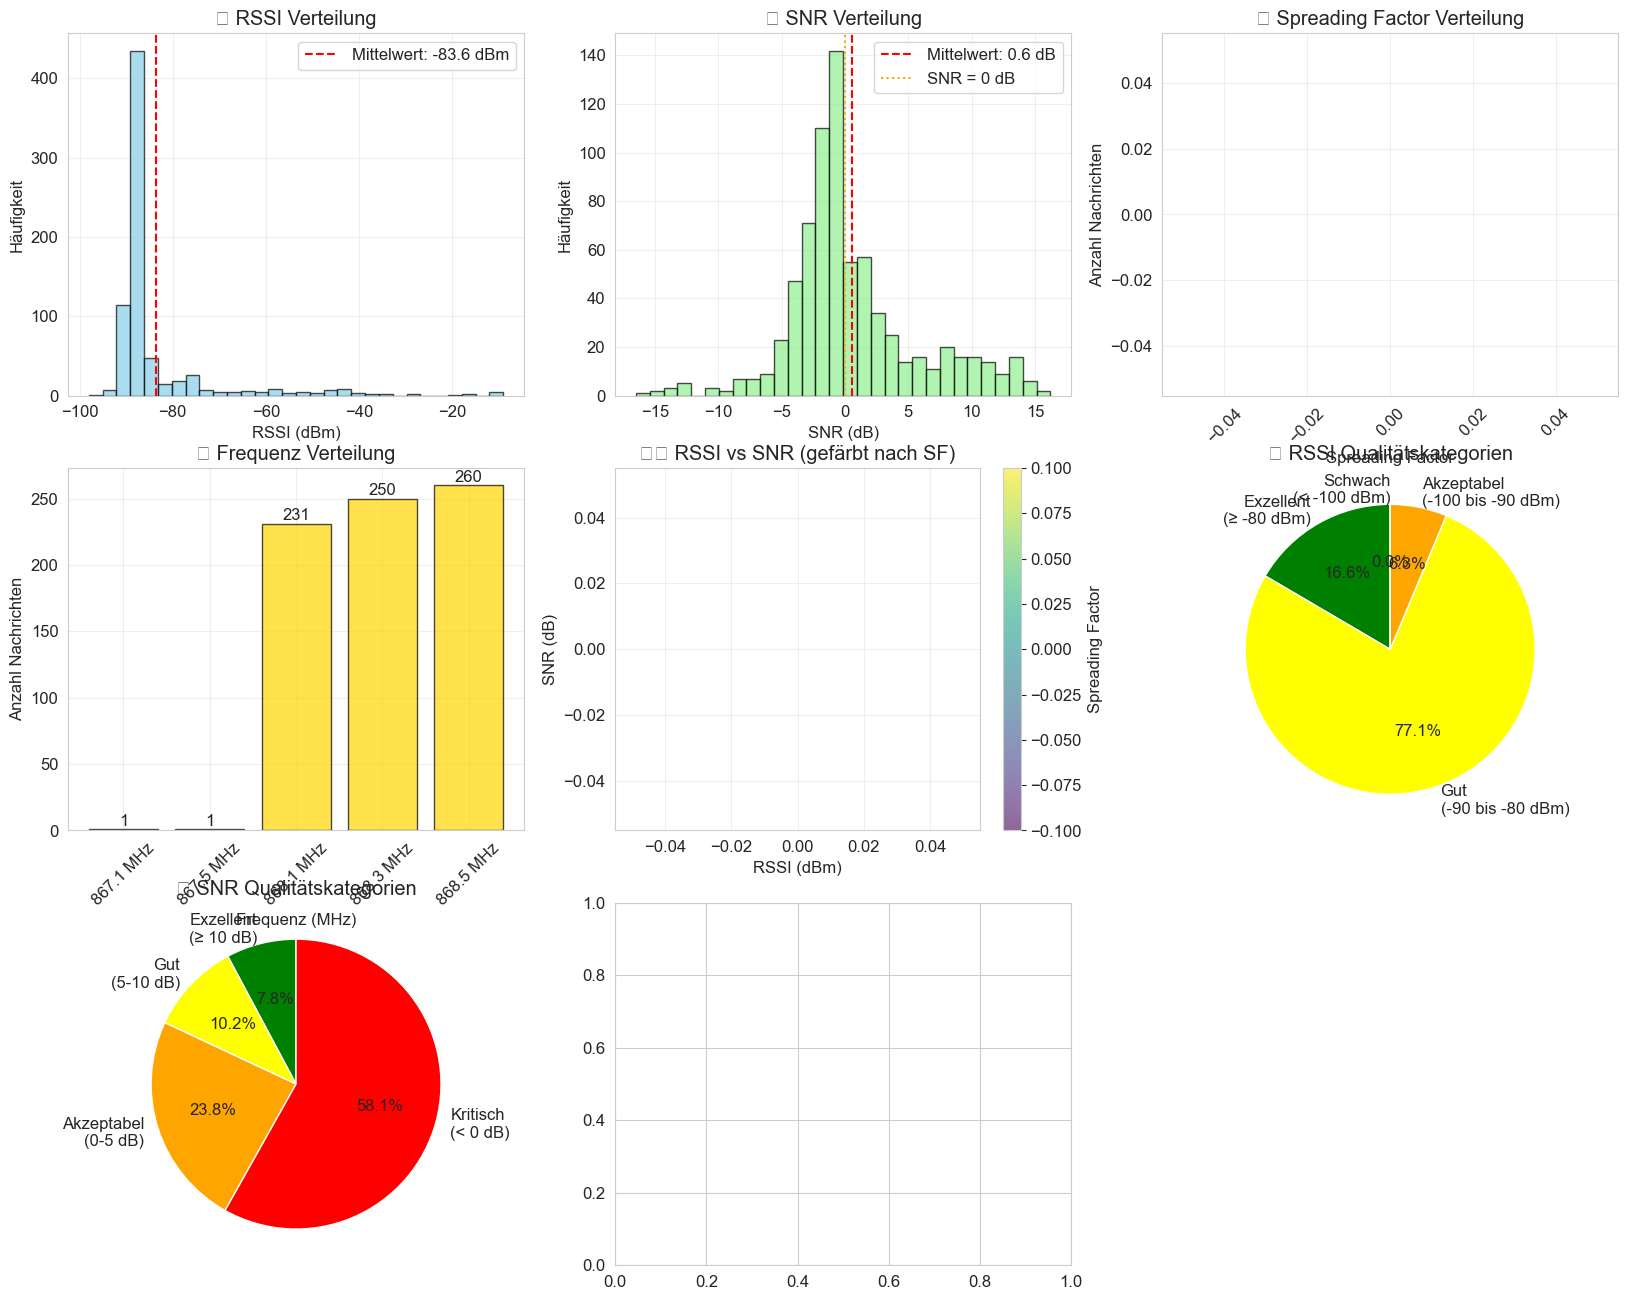

In [ ]:
def create_visualizations(df):
    """
    Erstellt verschiedene Visualisierungen der LoRaWAN-Daten
    """
    if df is None or len(df) == 0:
        print("❌ Keine Daten für Visualisierungen verfügbar")
        return
    
    # Erstelle ein großes Figure mit Subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. RSSI Histogramm
    plt.subplot(3, 3, 1)
    plt.hist(df['rssi_dbm'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(df['rssi_dbm'].mean(), color='red', linestyle='--', label=f'Mittelwert: {df["rssi_dbm"].mean():.1f} dBm')
    plt.xlabel('RSSI (dBm)')
    plt.ylabel('Häufigkeit')
    plt.title('📶 RSSI Verteilung')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. SNR Histogramm
    plt.subplot(3, 3, 2)
    plt.hist(df['snr_db'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(df['snr_db'].mean(), color='red', linestyle='--', label=f'Mittelwert: {df["snr_db"].mean():.1f} dB')
    plt.axvline(0, color='orange', linestyle=':', label='SNR = 0 dB')
    plt.xlabel('SNR (dB)')
    plt.ylabel('Häufigkeit')
    plt.title('📡 SNR Verteilung')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Spreading Factor Balkendiagramm
    plt.subplot(3, 3, 3)
    sf_counts = df['spreading_factor'].value_counts().sort_index()
    # Filter out NaN values from index
    sf_labels = []
    sf_values = []
    for sf, count in zip(sf_counts.index, sf_counts.values):
        try:
            if pd.isna(sf):
                continue
            sf_labels.append(f'SF{int(sf)}')
            sf_values.append(count)
        except Exception:
            continue
    bars = plt.bar(sf_labels, sf_values, color='coral', alpha=0.7, edgecolor='black')
    plt.xlabel('Spreading Factor')
    plt.ylabel('Anzahl Nachrichten')
    plt.title('🔄 Spreading Factor Verteilung')
    plt.xticks(rotation=45)
    
    # Werte auf den Balken anzeigen
    for bar, count in zip(bars, sf_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3)
    
    # 4. Frequenz Balkendiagramm
    plt.subplot(3, 3, 4)
    freq_counts = df['frequency'].value_counts().sort_index()
    freq_mhz = [f/1_000_000 for f in freq_counts.index]
    bars = plt.bar([f'{freq:.1f} MHz' for freq in freq_mhz], freq_counts.values,
                   color='gold', alpha=0.7, edgecolor='black')
    plt.xlabel('Frequenz (MHz)')
    plt.ylabel('Anzahl Nachrichten')
    plt.title('📻 Frequenz Verteilung')
    plt.xticks(rotation=45)
    
    # Werte auf den Balken anzeigen
    for bar, count in zip(bars, freq_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3)
    
    # 5. RSSI vs SNR Scatter Plot
    plt.subplot(3, 3, 5)
    scatter = plt.scatter(df['rssi_dbm'], df['snr_db'], 
                         c=df['spreading_factor'], cmap='viridis', 
                         alpha=0.6, s=50)
    plt.colorbar(scatter, label='Spreading Factor')
    plt.xlabel('RSSI (dBm)')
    plt.ylabel('SNR (dB)')
    plt.title('📶📡 RSSI vs SNR (gefärbt nach SF)')
    plt.grid(True, alpha=0.3)
    
    # 6. RSSI Qualitätskategorien
    plt.subplot(3, 3, 6)
    rssi_categories = {
        'Exzellent\n(≥ -80 dBm)': (df['rssi_dbm'] >= -80).sum(),
        'Gut\n(-90 bis -80 dBm)': ((df['rssi_dbm'] >= -90) & (df['rssi_dbm'] < -80)).sum(),
        'Akzeptabel\n(-100 bis -90 dBm)': ((df['rssi_dbm'] >= -100) & (df['rssi_dbm'] < -90)).sum(),
        'Schwach\n(< -100 dBm)': (df['rssi_dbm'] < -100).sum()
    }
    
    colors = ['green', 'yellow', 'orange', 'red']
    wedges, texts, autotexts = plt.pie(rssi_categories.values(), 
                                      labels=rssi_categories.keys(),
                                      colors=colors, autopct='%1.1f%%',
                                      startangle=90)
    plt.title('📶 RSSI Qualitätskategorien')
    
    # 7. SNR Qualitätskategorien
    plt.subplot(3, 3, 7)
    snr_categories = {
        'Exzellent\n(≥ 10 dB)': (df['snr_db'] >= 10).sum(),
        'Gut\n(5-10 dB)': ((df['snr_db'] >= 5) & (df['snr_db'] < 10)).sum(),
        'Akzeptabel\n(0-5 dB)': ((df['snr_db'] >= 0) & (df['snr_db'] < 5)).sum(),
        'Kritisch\n(< 0 dB)': (df['snr_db'] < 0).sum()
    }
    
    wedges, texts, autotexts = plt.pie(snr_categories.values(), 
                                      labels=snr_categories.keys(),
                                      colors=colors, autopct='%1.1f%%',
                                      startangle=90)
    plt.title('📡 SNR Qualitätskategorien')
    
    # 8. Boxplot für RSSI nach Spreading Factor
    plt.subplot(3, 3, 8)
    sf_values = sorted(df['spreading_factor'].unique())
    rssi_by_sf = [df[df['spreading_factor'] == sf]['rssi_dbm'] for sf in sf_values]
    plt.boxplot(rssi_by_sf, labels=[f'SF{int(sf)}' for sf in sf_values])
    plt.xlabel('Spreading Factor')
    plt.ylabel('RSSI (dBm)')
    plt.title('📶 RSSI nach Spreading Factor')
    plt.grid(True, alpha=0.3)
    
    # 9. Boxplot für SNR nach Spreading Factor
    plt.subplot(3, 3, 9)
    snr_by_sf = [df[df['spreading_factor'] == sf]['snr_db'] for sf in sf_values]
    plt.boxplot(snr_by_sf, labels=[f'SF{int(sf)}' for sf in sf_values])
    plt.xlabel('Spreading Factor')
    plt.ylabel('SNR (dB)')
    plt.title('📡 SNR nach Spreading Factor')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Zusätzliche Zeitreihen-Visualisierung falls Zeitstempel verfügbar
    time_columns = ['timestamp', 'time', 'datetime']
    time_col = None
    for col in time_columns:
        if col in df.columns:
            time_col = col
            break
    
    if time_col is not None:
        try:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
            
            # RSSI über Zeit
            ax1.plot(df[time_col], df['rssi_dbm'], 'b-', alpha=0.7, linewidth=1)
            ax1.scatter(df[time_col], df['rssi_dbm'], c=df['spreading_factor'], 
                       cmap='viridis', s=20, alpha=0.6)
            ax1.set_ylabel('RSSI (dBm)')
            ax1.set_title('📶 RSSI über Zeit (gefärbt nach SF)')
            ax1.grid(True, alpha=0.3)
            
            # SNR über Zeit
            ax2.plot(df[time_col], df['snr_db'], 'r-', alpha=0.7, linewidth=1)
            ax2.scatter(df[time_col], df['snr_db'], c=df['spreading_factor'], 
                       cmap='viridis', s=20, alpha=0.6)
            ax2.axhline(y=0, color='orange', linestyle='--', alpha=0.7, label='SNR = 0 dB')
            ax2.set_xlabel('Zeit')
            ax2.set_ylabel('SNR (dB)')
            ax2.set_title('📡 SNR über Zeit (gefärbt nach SF)')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"⚠️  Zeitreihen-Visualisierung nicht möglich: {e}")

# Erstelle Visualisierungen
if df_clean is not None:
    create_visualizations(df_clean)

## 5. Erweiterte Analysen

In [ ]:
def advanced_analysis(df):
    """
    Führt erweiterte Analysen durch
    """
    if df is None or len(df) == 0:
        return
    
    print("\n" + "="*60)
    print("🔬 ERWEITERTE ANALYSEN")
    print("="*60)
    
    # Korrelationsanalyse
    print("\n📊 Korrelationsanalyse:")
    numeric_cols = ['rssi_dbm', 'snr_db', 'spreading_factor', 'frequency']
    correlation_matrix = df[numeric_cols].corr()
    
    print(f"   RSSI ↔ SNR: {correlation_matrix.loc['rssi_dbm', 'snr_db']:.3f}")
    print(f"   RSSI ↔ SF: {correlation_matrix.loc['rssi_dbm', 'spreading_factor']:.3f}")
    print(f"   SNR ↔ SF: {correlation_matrix.loc['snr_db', 'spreading_factor']:.3f}")
    
    # Korrelations-Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f')
    plt.title('🔥 Korrelations-Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Spreading Factor Effizienz
    print("\n⚡ Spreading Factor Effizienz:")
    sf_analysis = df.groupby('spreading_factor').agg({
        'rssi_dbm': ['mean', 'std', 'min', 'max'],
        'snr_db': ['mean', 'std', 'min', 'max']
    }).round(2)
    
    for sf in sorted(df['spreading_factor'].unique()):
        sf_data = df[df['spreading_factor'] == sf]
        count = len(sf_data)
        rssi_mean = sf_data['rssi_dbm'].mean()
        snr_mean = sf_data['snr_db'].mean()
        
        print(f"   SF{int(sf)}: {count} Nachrichten, RSSI Ø {rssi_mean:.1f} dBm, SNR Ø {snr_mean:.1f} dB")
    
    # Datenqualitäts-Score
    print("\n🏆 Datenqualitäts-Score:")
    
    # RSSI Score (0-100)
    rssi_score = 0
    if (df['rssi_dbm'] >= -80).sum() / len(df) >= 0.8:
        rssi_score = 100
    elif (df['rssi_dbm'] >= -90).sum() / len(df) >= 0.8:
        rssi_score = 80
    elif (df['rssi_dbm'] >= -100).sum() / len(df) >= 0.8:
        rssi_score = 60
    else:
        rssi_score = 40
    
    # SNR Score (0-100)
    snr_score = 0
    if (df['snr_db'] >= 10).sum() / len(df) >= 0.8:
        snr_score = 100
    elif (df['snr_db'] >= 5).sum() / len(df) >= 0.8:
        snr_score = 80
    elif (df['snr_db'] >= 0).sum() / len(df) >= 0.8:
        snr_score = 60
    else:
        snr_score = 40
    
    # Konsistenz Score
    rssi_cv = df['rssi_dbm'].std() / abs(df['rssi_dbm'].mean())
    snr_cv = df['snr_db'].std() / abs(df['snr_db'].mean()) if df['snr_db'].mean() != 0 else 1
    
    consistency_score = max(0, 100 - (rssi_cv + snr_cv) * 50)
    
    # Gesamtscore
    total_score = (rssi_score * 0.4 + snr_score * 0.4 + consistency_score * 0.2)
    
    print(f"   📶 RSSI Qualität: {rssi_score}/100")
    print(f"   📡 SNR Qualität: {snr_score}/100")
    print(f"   🎯 Konsistenz: {consistency_score:.0f}/100")
    print(f"   🏆 Gesamtscore: {total_score:.0f}/100")
    
    if total_score >= 90:
        print("   ⭐⭐⭐⭐⭐ Hervorragend!")
    elif total_score >= 80:
        print("   ⭐⭐⭐⭐ Sehr gut!")
    elif total_score >= 70:
        print("   ⭐⭐⭐ Gut")
    elif total_score >= 60:
        print("   ⭐⭐ Akzeptabel")
    else:
        print("   ⭐ Verbesserungsbedürftig")

# Führe erweiterte Analysen durch
if df_clean is not None:
    advanced_analysis(df_clean)

## 6. Export und Speichern der Ergebnisse

In [ ]:
def export_analysis_results(df, output_path=None):
    """
    Exportiert die Analyseergebnisse in verschiedene Formate
    """
    if df is None or len(df) == 0:
        return
    
    if output_path is None:
        output_path = Path(r"C:\Users\Admin01\Documents\Bachlore\gatewaylistener\Lora_Sesion_Data\Müll")
    
    output_path = Path(output_path)
    
    print("\n💾 Exportiere Analyseergebnisse...")
    
    try:
        # 1. Bereinigte Daten als CSV
        cleaned_data_path = output_path / "lorawan_cleaned_data.csv"
        df.to_csv(cleaned_data_path, index=False)
        print(f"✅ Bereinigte Daten gespeichert: {cleaned_data_path}")
        
        # 2. Statistik-Zusammenfassung
        stats_path = output_path / "lorawan_statistics.txt"
        with open(stats_path, 'w', encoding='utf-8') as f:
            f.write("LoRaWAN Session Analyse - Statistik-Zusammenfassung\n")
            f.write("="*60 + "\n\n")
            
            # Grundlegende Statistiken
            f.write(f"Gesamtanzahl Nachrichten: {len(df)}\n\n")
            
            # RSSI Statistiken
            rssi_stats = df['rssi_dbm'].describe()
            f.write("RSSI Statistiken:\n")
            f.write(f"  Durchschnitt: {rssi_stats['mean']:.2f} dBm\n")
            f.write(f"  Bereich: {rssi_stats['min']:.1f} bis {rssi_stats['max']:.1f} dBm\n")
            f.write(f"  Standardabweichung: {rssi_stats['std']:.2f} dBm\n\n")
            
            # SNR Statistiken
            snr_stats = df['snr_db'].describe()
            f.write("SNR Statistiken:\n")
            f.write(f"  Durchschnitt: {snr_stats['mean']:.2f} dB\n")
            f.write(f"  Bereich: {snr_stats['min']:.1f} bis {snr_stats['max']:.1f} dB\n")
            f.write(f"  Standardabweichung: {snr_stats['std']:.2f} dB\n\n")
            
            # Spreading Factor Verteilung
            f.write("Spreading Factor Verteilung:\n")
            sf_counts = df['spreading_factor'].value_counts().sort_index()
            for sf, count in sf_counts.items():
                percentage = (count / len(df)) * 100
                f.write(f"  SF{int(sf)}: {count} Nachrichten ({percentage:.1f}%)\n")
            
            f.write("\n")
            
            # Frequenz Verteilung
            f.write("Frequenz Verteilung:\n")
            freq_counts = df['frequency'].value_counts().sort_index()
            for freq, count in freq_counts.items():
                percentage = (count / len(df)) * 100
                freq_mhz = freq / 1_000_000
                f.write(f"  {freq_mhz:.1f} MHz: {count} Nachrichten ({percentage:.1f}%)\n")
        
        print(f"✅ Statistik-Zusammenfassung gespeichert: {stats_path}")
        
        # 3. Excel-Datei mit mehreren Arbeitsblättern
        excel_path = output_path / "lorawan_analysis_complete.xlsx"
        with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
            # Rohdaten
            df.to_excel(writer, sheet_name='Rohdaten', index=False)
            
            # Statistiken
            stats_df = pd.DataFrame({
                'Metrik': ['RSSI Durchschnitt', 'RSSI Min', 'RSSI Max', 'RSSI Std',
                          'SNR Durchschnitt', 'SNR Min', 'SNR Max', 'SNR Std',
                          'Anzahl Nachrichten'],
                'Wert': [rssi_stats['mean'], rssi_stats['min'], rssi_stats['max'], rssi_stats['std'],
                        snr_stats['mean'], snr_stats['min'], snr_stats['max'], snr_stats['std'],
                        len(df)],
                'Einheit': ['dBm', 'dBm', 'dBm', 'dBm', 'dB', 'dB', 'dB', 'dB', '-']
            })
            stats_df.to_excel(writer, sheet_name='Statistiken', index=False)
            
            # Spreading Factor Verteilung
            sf_df = pd.DataFrame({
                'Spreading Factor': [f'SF{int(sf)}' for sf in sf_counts.index],
                'Anzahl': sf_counts.values,
                'Prozent': [(count / len(df)) * 100 for count in sf_counts.values]
            })
            sf_df.to_excel(writer, sheet_name='SF_Verteilung', index=False)
            
            # Frequenz Verteilung
            freq_df = pd.DataFrame({
                'Frequenz_MHz': [freq / 1_000_000 for freq in freq_counts.index],
                'Anzahl': freq_counts.values,
                'Prozent': [(count / len(df)) * 100 for count in freq_counts.values]
            })
            freq_df.to_excel(writer, sheet_name='Frequenz_Verteilung', index=False)
        
        print(f"✅ Excel-Analyse gespeichert: {excel_path}")
        
        print(f"\n📁 Alle Dateien gespeichert in: {output_path}")
        
    except Exception as e:
        print(f"❌ Fehler beim Exportieren: {e}")

# Exportiere die Ergebnisse
if df_clean is not None:
    export_analysis_results(df_clean)

print("\n🎉 Analyse abgeschlossen!")
print("\n💡 Tipps:")
print("   - Für bessere Performance: RSSI > -90 dBm und SNR > 0 dB anstreben")
print("   - Niedrigere Spreading Factors (SF7-SF9) bieten höhere Datenrate")
print("   - Höhere Spreading Factors (SF10-SF12) bieten größere Reichweite")
print("   - Überwachen Sie die Paketverlustrate für optimale Performance")